In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
dataframe_train = pd.read_csv('C:/Users/nisar/Desktop/udemy/Simplilearn/Course Material/Machine_Learning_ILT_June_2022/My data/titanic.csv')
dataframe_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataframe_train.shape

(891, 12)

In [5]:
dataframe_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
dataframe_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
dataframe_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
dataframe_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
dataframe_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataframe_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# All these columns seems to be irrelevant. 
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked']

In [12]:
dataframe_train = dataframe_train.drop(columns_to_drop, axis = 1)
dataframe_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [13]:
dataframe_train[dataframe_train['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [14]:
# Smart way of replacing null values in age column by looking into Pclass as reference column
dataframe_train.groupby('Pclass').mean()[['Age']]

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [15]:
dataframe_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [16]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1 :
            return 39
        elif Pclass == 2:
            return 30
        else:
            return 24
    else:
        return Age

In [17]:
dataframe_train['Age'] = dataframe_train[['Age','Pclass']].apply(age_approx, axis = 1)


In [18]:
dataframe_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [19]:
dataframe_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [20]:
# applying one hot encoding on sex col
dataframe_train_one_hot = pd.get_dummies(dataframe_train, columns = ['Sex'])

In [21]:
dataframe_train_one_hot

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,24.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
age_mm_scaler = StandardScaler()
fare_std_scaler = StandardScaler()

dataframe_train_one_hot['Age'] = age_mm_scaler.fit_transform(dataframe_train_one_hot[['Age']])
dataframe_train_one_hot['Fare'] = fare_std_scaler.fit_transform(dataframe_train_one_hot[['Fare']])


In [23]:
dataframe_train_one_hot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,-0.538003,1,0,-0.502445,0,1
1,1,1,0.666578,1,0,0.786845,1,0
2,1,3,-0.236858,0,0,-0.488854,1,0
3,1,1,0.440719,1,0,0.420730,1,0
4,0,3,0.440719,0,0,-0.486337,0,1


In [24]:
dataframe_train_one_hot.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male'],
      dtype='object')

Text(0.5, 1.0, 'Correlation map')

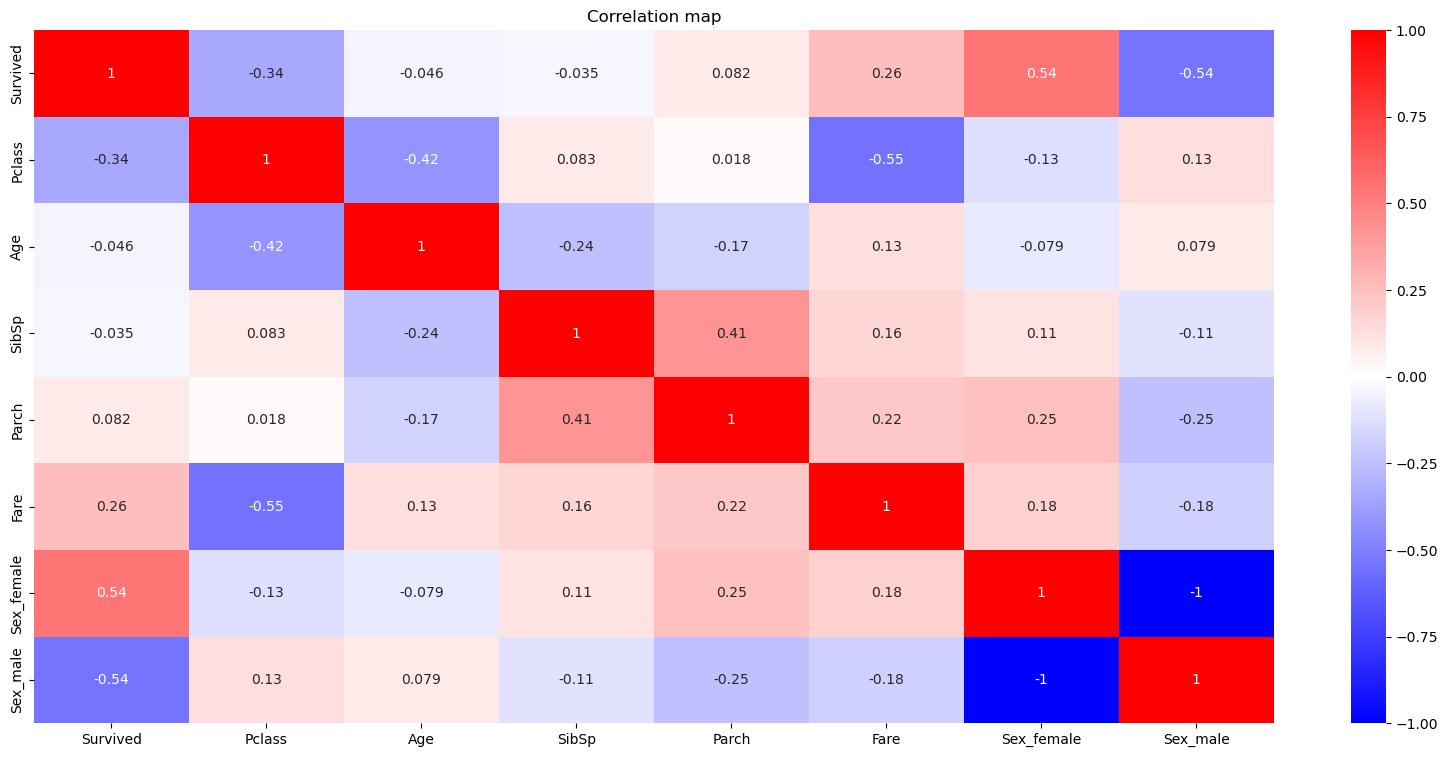

In [25]:
#to find the pairwise correlation
plt.figure(figsize=(20,9));
sns.heatmap(dataframe_train_one_hot.corr(),annot=True,cmap='bwr');  
plt.title("Correlation map")

In [26]:
X = dataframe_train_one_hot[['Pclass', 'Age','SibSp','Parch', 'Fare', 'Sex_female', 'Sex_male']]
y = dataframe_train_one_hot['Survived']

In [27]:
X.shape,y.shape

((891, 7), (891,))

In [28]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,-0.538003,1,0,-0.502445,0,1
1,1,0.666578,1,0,0.786845,1,0
2,3,-0.236858,0,0,-0.488854,1,0
3,1,0.440719,1,0,0.420730,1,0
4,3,0.440719,0,0,-0.486337,0,1


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 6)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [32]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [33]:
# X_test['Fare'] = fare_std_scaler.transform(X_test[['Fare']])
# X_test['Age'] = fare_std_scaler.transform(X_test[['Age']])

In [34]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [35]:
for i in range(len(X_test)):
               print(logreg.predict_proba(X_test)[i])

[0.06944503 0.93055497]
[0.91465755 0.08534245]
[0.89714331 0.10285669]
[0.13578224 0.86421776]
[0.55886009 0.44113991]
[0.9378918 0.0621082]
[0.91893442 0.08106558]
[0.88931512 0.11068488]
[0.87205309 0.12794691]
[0.92295005 0.07704995]
[0.64421115 0.35578885]
[0.28386448 0.71613552]
[0.74749826 0.25250174]
[0.88015904 0.11984096]
[0.13234865 0.86765135]
[0.89333168 0.10666832]
[0.87202302 0.12797698]
[0.93910629 0.06089371]
[0.20590868 0.79409132]
[0.4217501 0.5782499]
[0.87205309 0.12794691]
[0.91368276 0.08631724]
[0.09877101 0.90122899]
[0.53799746 0.46200254]
[0.67184381 0.32815619]
[0.90713823 0.09286177]
[0.93623904 0.06376096]
[0.74749826 0.25250174]
[0.78554114 0.21445886]
[0.38204333 0.61795667]
[0.12618751 0.87381249]
[0.87992379 0.12007621]
[0.92911187 0.07088813]
[0.94365134 0.05634866]
[0.44874492 0.55125508]
[0.87221798 0.12778202]
[0.90453319 0.09546681]
[0.79125591 0.20874409]
[0.93469797 0.06530203]
[0.43411643 0.56588357]
[0.57969389 0.42030611]
[0.85337789 0.146622

In [36]:
from sklearn import metrics

In [37]:
metrics.accuracy_score(y_test, y_pred)

0.8609865470852018

In [38]:
metrics.confusion_matrix(y_test, y_pred)

array([[133,   9],
       [ 22,  59]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       142
           1       0.87      0.73      0.79        81

    accuracy                           0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.86       223

